# COVID-19 VACCIANTION DATA ANALYTICS


## Introduction


The data contains the following information:

1. Country - this is the country for which the vaccination information is provided
2. Country ISO Code - ISO code for the country
3. Date - date for the data entry
4. Total number of vaccinations - this is the absolute number of total immunizations in the country
5. Total number of people vaccinated - a person, vaccinated with atleast one dose of vaccine 

6. Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2)
8. Daily vaccinations - for a certain data entry, the number of vaccination for that date/country
9. Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the     country
10. Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;

11. Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country
12. Number of vaccinations per day - number of daily vaccination for that day and country
13. Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country
14. Vaccines used in the country - total number of vaccines used in the country (up to date)

In [1]:
import numpy as np
import pandas as pd


# DATA PREPERATION AND CLEANING

In [2]:
df = pd.read_csv(r"C:\Users\gupta\Music\COVID 19 DATA SET ANALYSIS\COVID-19-(16.10.2021-16.11.2021)\Data\country_vaccinations.csv")

In [3]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,16-10-2021,NaN,NaN,NaN,NaN,36635.0,NaN,NaN,NaN,920.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Albania,ALB,16-10-2021,NaN,NaN,NaN,NaN,5205.0,NaN,NaN,NaN,1812.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,16-10-2021,NaN,NaN,NaN,NaN,35543.0,NaN,NaN,NaN,797.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
3,Andorra,AND,16-10-2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,853.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Angola,AGO,16-10-2021,NaN,NaN,NaN,NaN,99953.0,NaN,NaN,NaN,2946.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              6003 non-null   object 
 1   iso_code                             6003 non-null   object 
 2   date                                 6003 non-null   object 
 3   total_vaccinations                   3264 non-null   float64
 4   people_vaccinated                    3078 non-null   float64
 5   people_fully_vaccinated              3164 non-null   float64
 6   daily_vaccinations_raw               2538 non-null   float64
 7   daily_vaccinations                   5988 non-null   float64
 8   total_vaccinations_per_hundred       3264 non-null   float64
 9   people_vaccinated_per_hundred        3078 non-null   float64
 10  people_fully_vaccinated_per_hundred  3164 non-null   float64
 11  daily_vaccinations_per_million

In [5]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.264000e+03,3.078000e+03,3.164000e+03,2.538000e+03,5.988000e+03,3264.000000,3078.000000,3164.000000,5988.000000
mean,6.132997e+07,2.433840e+07,1.788452e+07,2.767442e+05,1.467787e+05,106.618364,56.007044,48.079238,3006.265030
std,2.474821e+08,8.171776e+07,5.527783e+07,9.922207e+05,5.903952e+05,52.793653,23.911752,24.098354,2843.569552
min,8.100000e+01,8.100000e+01,1.440000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.632520e+06,9.718650e+05,7.748615e+05,3.868250e+03,1.526000e+03,71.770000,41.657500,29.922500,1041.000000
50%,8.052330e+06,4.316702e+06,3.767670e+06,2.163750e+04,9.336000e+03,118.130000,63.360000,54.700000,2165.000000
75%,3.489278e+07,1.784059e+07,1.496733e+07,1.434195e+05,5.286100e+04,145.860000,74.537500,66.535000,4154.000000
max,2.396045e+09,1.185237e+09,1.073845e+09,1.123178e+07,8.815000e+06,280.400000,121.060000,118.180000,21339.000000


In [6]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [7]:
df.fillna(0, inplace = True)
df['iso_code'].fillna('GBR', inplace=True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [8]:
df.drop(["source_name","source_website","people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million","people_vaccinated_per_hundred"],axis=1, inplace=True)


In [9]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
0,Afghanistan,AFG,16-10-2021,0.0,0.0,36635.0,0.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Albania,ALB,16-10-2021,0.0,0.0,5205.0,0.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ..."
2,Algeria,DZA,16-10-2021,0.0,0.0,35543.0,0.00,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
3,Andorra,AND,16-10-2021,0.0,0.0,66.0,0.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
4,Angola,AGO,16-10-2021,0.0,0.0,99953.0,0.00,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...
5998,United States,USA,16-11-2021,443374199.0,227691941.0,800758.0,131.83,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
5999,Uruguay,URY,16-11-2021,6700078.0,2772980.0,4426.0,192.25,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac"
6000,Uzbekistan,UZB,16-11-2021,30011822.0,15700898.0,262991.0,88.44,"Moderna, Oxford/AstraZeneca, Sputnik V, ZF2001"
6001,Zambia,ZMB,16-11-2021,1001286.0,0.0,5176.0,5.29,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm..."


# EXPLORATORY DATA ANALYSIS AND VISUALIZATION


## RAW VISUALIZATION OF 4 COUNTRIES

We will initialize the Python packages. we will use for data ingestion, preparation and visualization. We will use mostly seaborn for visualization. Then we read the data file and aggregate the data on few fields (country, iso_code and vaccines - that is the vaccination scheme used in a certain country).

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.rc('font', size=12)

## 1. INDIA

In [11]:
df_India = df[df["iso_code"] == 'IND'].copy()
df_India.drop(['people_vaccinated'], axis = 1, inplace = True)
df_India

,country,iso_code,date,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,vaccines
88,India,IND,16-10-2021,9.726861e+08,4236032.0,69.81,"Covaxin, Oxford/AstraZeneca, Sputnik V"
299,India,IND,17-10-2021,9.763447e+08,3600695.0,70.07,"Covaxin, Oxford/AstraZeneca, Sputnik V"
510,India,IND,18-10-2021,9.789547e+08,3435235.0,70.26,"Covaxin, Oxford/AstraZeneca, Sputnik V"
722,India,IND,19-10-2021,9.871131e+08,3681917.0,70.84,"Covaxin, Oxford/AstraZeneca, Sputnik V"
934,India,IND,20-10-2021,9.973990e+08,4499241.0,71.58,"Covaxin, Oxford/AstraZeneca, Sputnik V"
1146,India,IND,21-10-2021,1.003204e+09,4977463.0,72.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
1355,India,IND,22-10-2021,1.009946e+09,5540317.0,72.48,"Covaxin, Oxford/AstraZeneca, Sputnik V"
1564,India,IND,23-10-2021,1.013637e+09,5850184.0,72.75,"Covaxin, Oxford/AstraZeneca, Sputnik V"
1772,India,IND,24-10-2021,1.022268e+09,6560451.0,73.36,"Covaxin, Oxford/AstraZeneca, Sputnik V"
1980,India,IND,25-10-2021,1.024150e+09,6456459.0,73.50,"Covaxin, Oxford/AstraZeneca, Sputnik V"


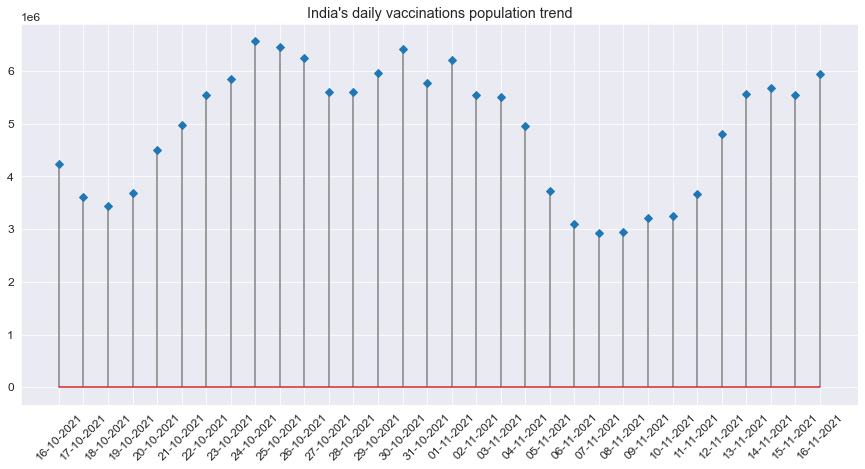

In [12]:
plt.figure(figsize=(15,7))
x = df_India["date"]
y = df_India["daily_vaccinations"]

plt.stem(x,y,linefmt='grey', markerfmt='D')

plt.title("India's daily vaccinations population trend")
plt.xticks(rotation=45)
plt.show();

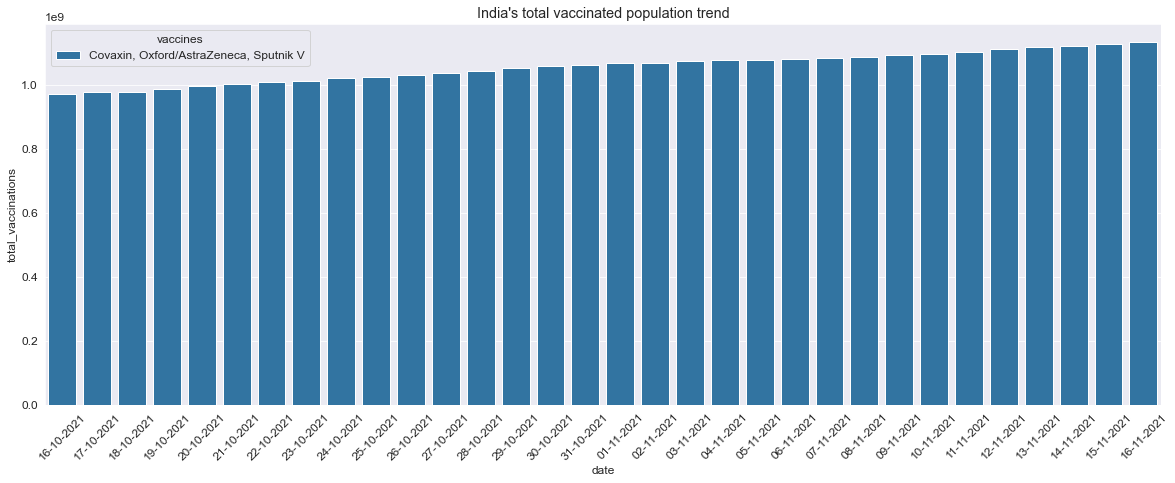

In [26]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_India, y="total_vaccinations",x="date",hue = 'vaccines')

plt.title("India's total vaccinated population trend")
plt.xticks(rotation=45);

## 2. CHINA

In [13]:
df_China = df[df["iso_code"] == 'CHN'].copy()

In [14]:
df_China.drop(['people_vaccinated'], axis = 1, inplace = True)
df_China

,country,iso_code,date,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,vaccines
39,China,CHN,16-10-2021,2.230567e+09,1491286.0,154.45,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
250,China,CHN,17-10-2021,2.232088e+09,1549000.0,154.55,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
461,China,CHN,18-10-2021,2.234096e+09,1632857.0,154.69,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
673,China,CHN,19-10-2021,2.236226e+09,1735000.0,154.84,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
885,China,CHN,20-10-2021,2.238325e+09,1831571.0,154.99,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
1097,China,CHN,21-10-2021,2.240550e+09,1888000.0,155.14,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
1306,China,CHN,22-10-2021,2.243018e+09,1972286.0,155.31,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
1515,China,CHN,23-10-2021,2.244727e+09,2022857.0,155.43,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
1723,China,CHN,24-10-2021,2.246217e+09,2018429.0,155.53,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
1931,China,CHN,25-10-2021,2.248688e+09,2084571.0,155.70,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."


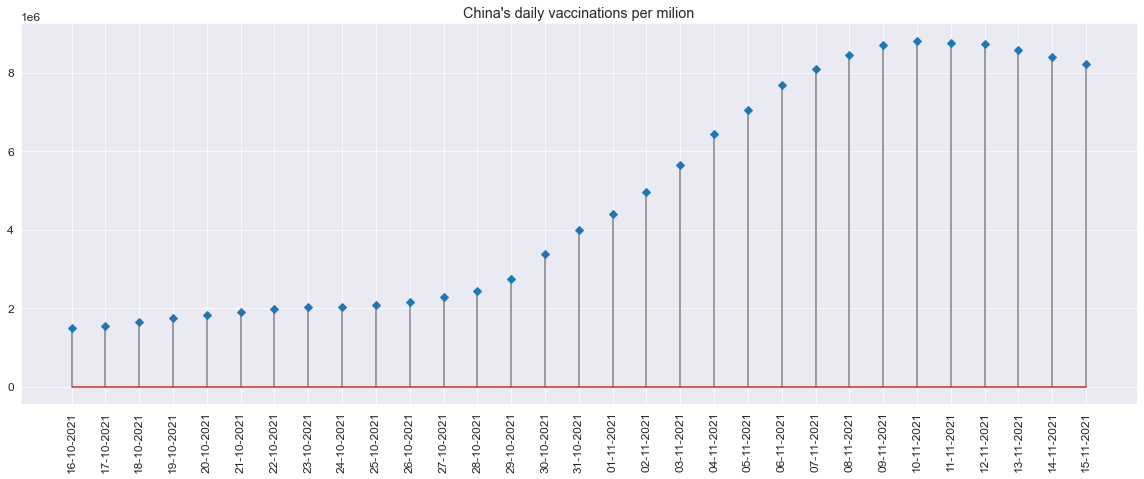

In [16]:
plt.figure(figsize=(20,7))
x = df_China["date"]
y = df_China["daily_vaccinations"]

plt.stem(x,y,linefmt='grey', markerfmt='D')
plt.xticks(rotation=90);
plt.title("China's daily vaccinations per milion");

## 3. UNITED STATES of AMERICA

In [30]:
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
200,United States,USA,16-10-2021,411671555.0,219153908.0,741737.0,122.40,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
411,United States,USA,17-10-2021,411930992.0,219239848.0,735657.0,122.48,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
622,United States,USA,18-10-2021,412721990.0,219469543.0,731768.0,122.72,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
834,United States,USA,19-10-2021,413500409.0,219678573.0,717088.0,122.95,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
1046,United States,USA,20-10-2021,414283537.0,219886458.0,706449.0,123.18,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
1255,United States,USA,21-10-2021,415086956.0,220099038.0,697456.0,123.42,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
1464,United States,USA,22-10-2021,416389090.0,220407875.0,741427.0,123.81,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
1672,United States,USA,23-10-2021,417184844.0,220598936.0,787613.0,124.04,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
1880,United States,USA,24-10-2021,417639137.0,220715892.0,815449.0,124.18,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
2088,United States,USA,25-10-2021,419085220.0,221042987.0,909033.0,124.61,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


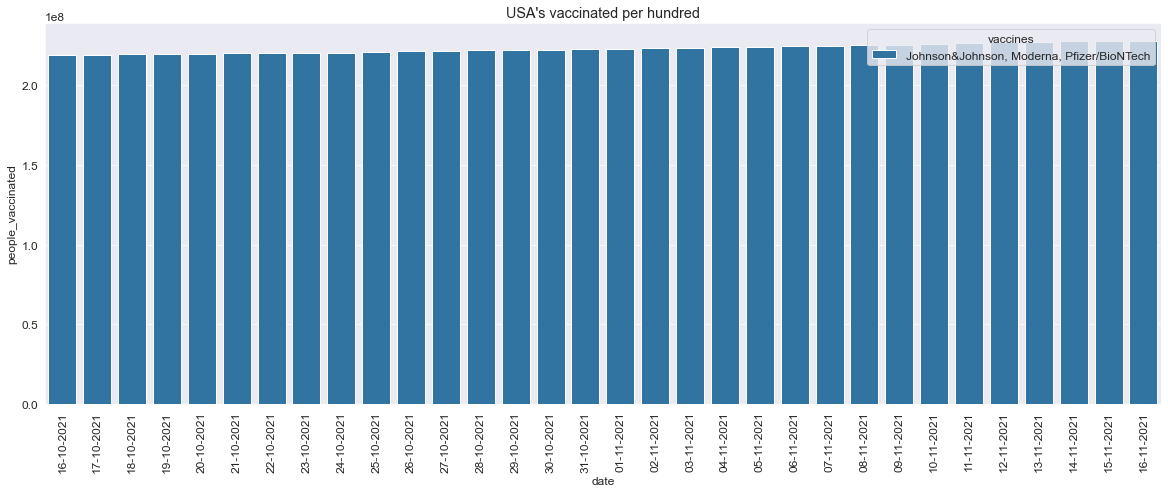

In [31]:
plt.figure(figsize=(20,7))

df_USA.drop(df_USA.index[df_USA['people_vaccinated'] == 0], inplace = True)

sns.barplot(data=df_USA,x="date",y="people_vaccinated", hue = 'vaccines')
plt.title("USA's vaccinated per hundred")

plt.xticks(rotation=90);

plt.show();

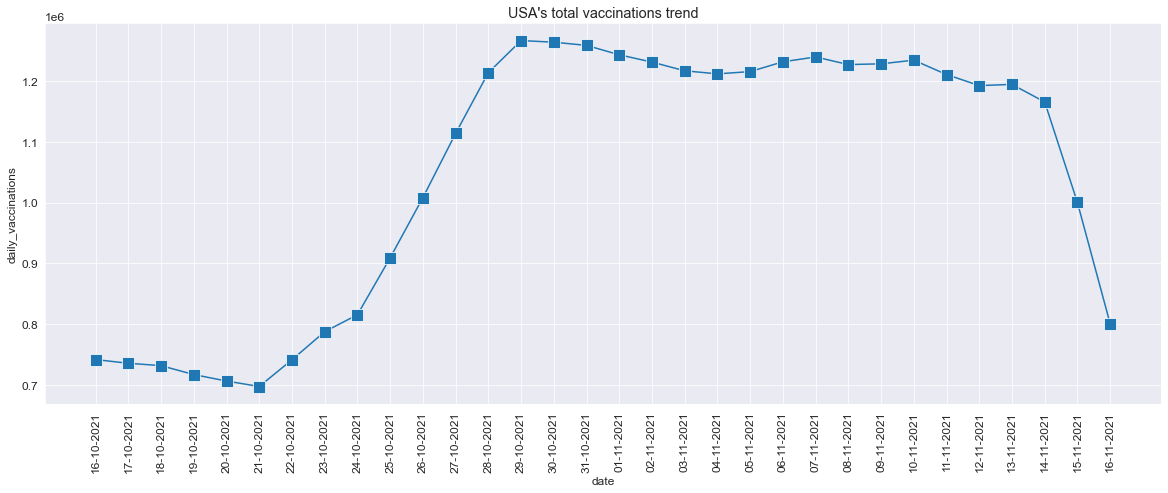

In [32]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_USA,x="date",y="daily_vaccinations",marker='s', markersize = 12);

plt.xticks(rotation=90);
plt.title("USA's total vaccinations trend");

# 4. RUSSIA

In [33]:
df_Russia = df[df["iso_code"] == 'RUS'].copy()
df_Russia

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
154,Russia,RUS,16-10-2021,0.0,0.0,327926.0,0.00,"EpiVacCorona, Sputnik V"
365,Russia,RUS,17-10-2021,0.0,0.0,398960.0,0.00,"EpiVacCorona, Sputnik V"
576,Russia,RUS,18-10-2021,0.0,0.0,473239.0,0.00,"EpiVacCorona, Sputnik V"
788,Russia,RUS,19-10-2021,0.0,0.0,556106.0,0.00,"EpiVacCorona, Sputnik V"
1000,Russia,RUS,20-10-2021,99382776.0,51965705.0,603792.0,68.11,"EpiVacCorona, Sputnik V"
1211,Russia,RUS,21-10-2021,99443669.0,52015298.0,585457.0,68.15,"EpiVacCorona, Sputnik V"
1420,Russia,RUS,22-10-2021,100030674.0,52450463.0,592169.0,68.56,"EpiVacCorona, Sputnik V"
1629,Russia,RUS,23-10-2021,100766655.0,52861352.0,597387.0,69.06,"EpiVacCorona, Sputnik V"
1837,Russia,RUS,24-10-2021,0.0,0.0,544947.0,0.00,"EpiVacCorona, Sputnik V"
2045,Russia,RUS,25-10-2021,0.0,0.0,492508.0,0.00,"EpiVacCorona, Sputnik V"


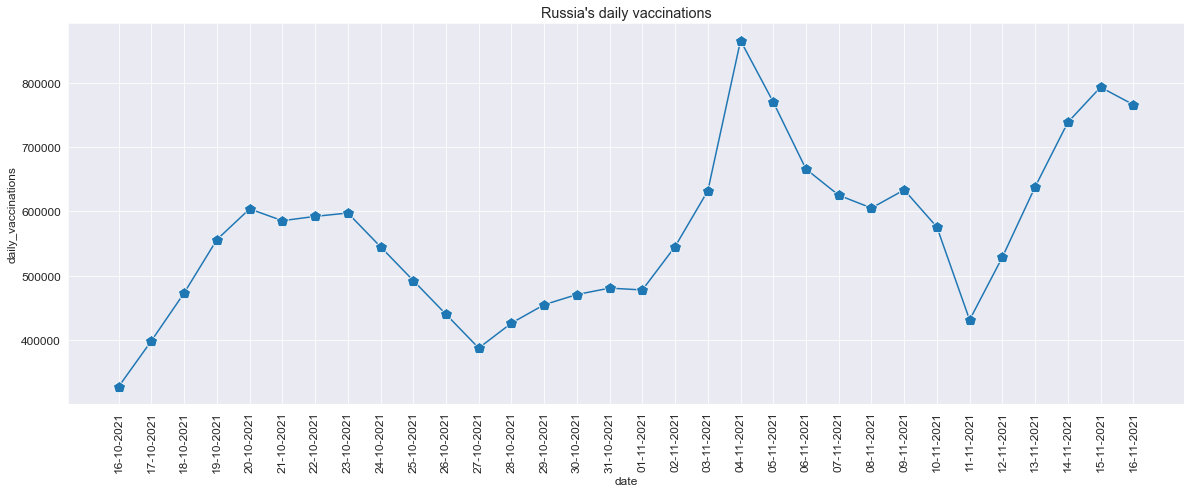

In [34]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_Russia,x="date",y="daily_vaccinations",marker='p', markersize = 12);

plt.xticks(rotation=90)
plt.title("Russia's daily vaccinations");

# ASKING AND ANSWERING QUESTIONS

# **1. Which country developed the vaccine the fastest?**

In [35]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines','total_vaccinations_per_hundred']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]
vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending=False)

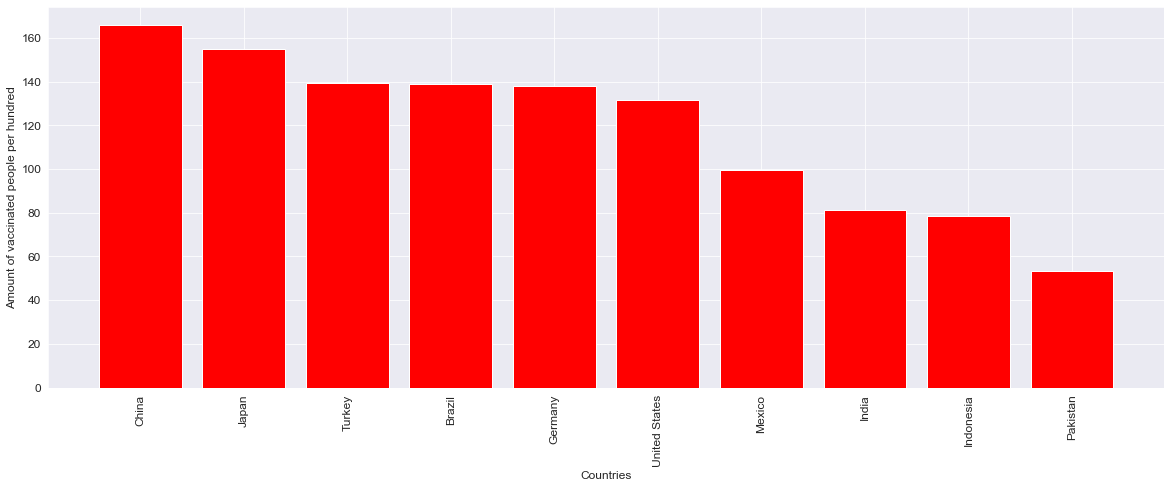

In [36]:
plt.figure(figsize=(20, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred, color = 'r')

plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

# **2. Which country has highest vaccinated people?**

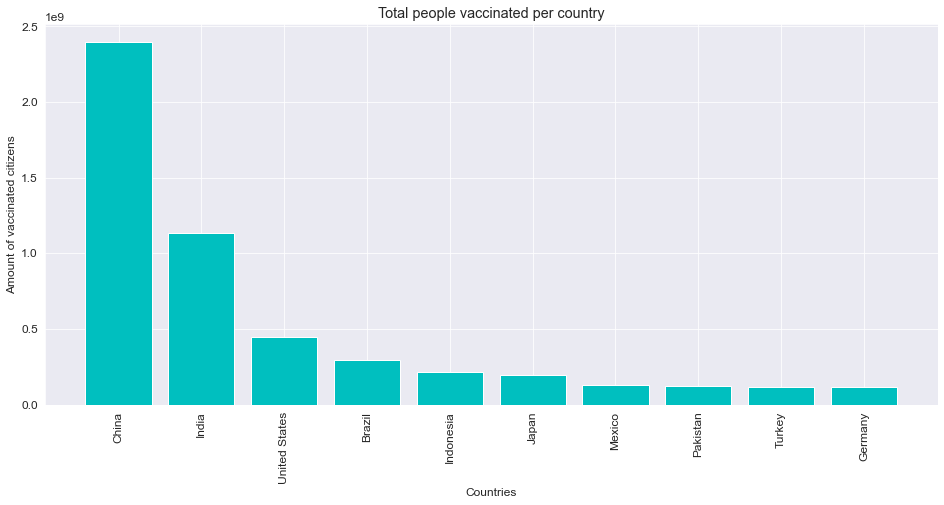

In [37]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]
plt.figure(figsize=(16, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations, color = 'c')
plt.title('Total people vaccinated per country')
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated citizens')
plt.xlabel('Countries')
plt.show();

# **3. Which categories of vaccines is offered?**

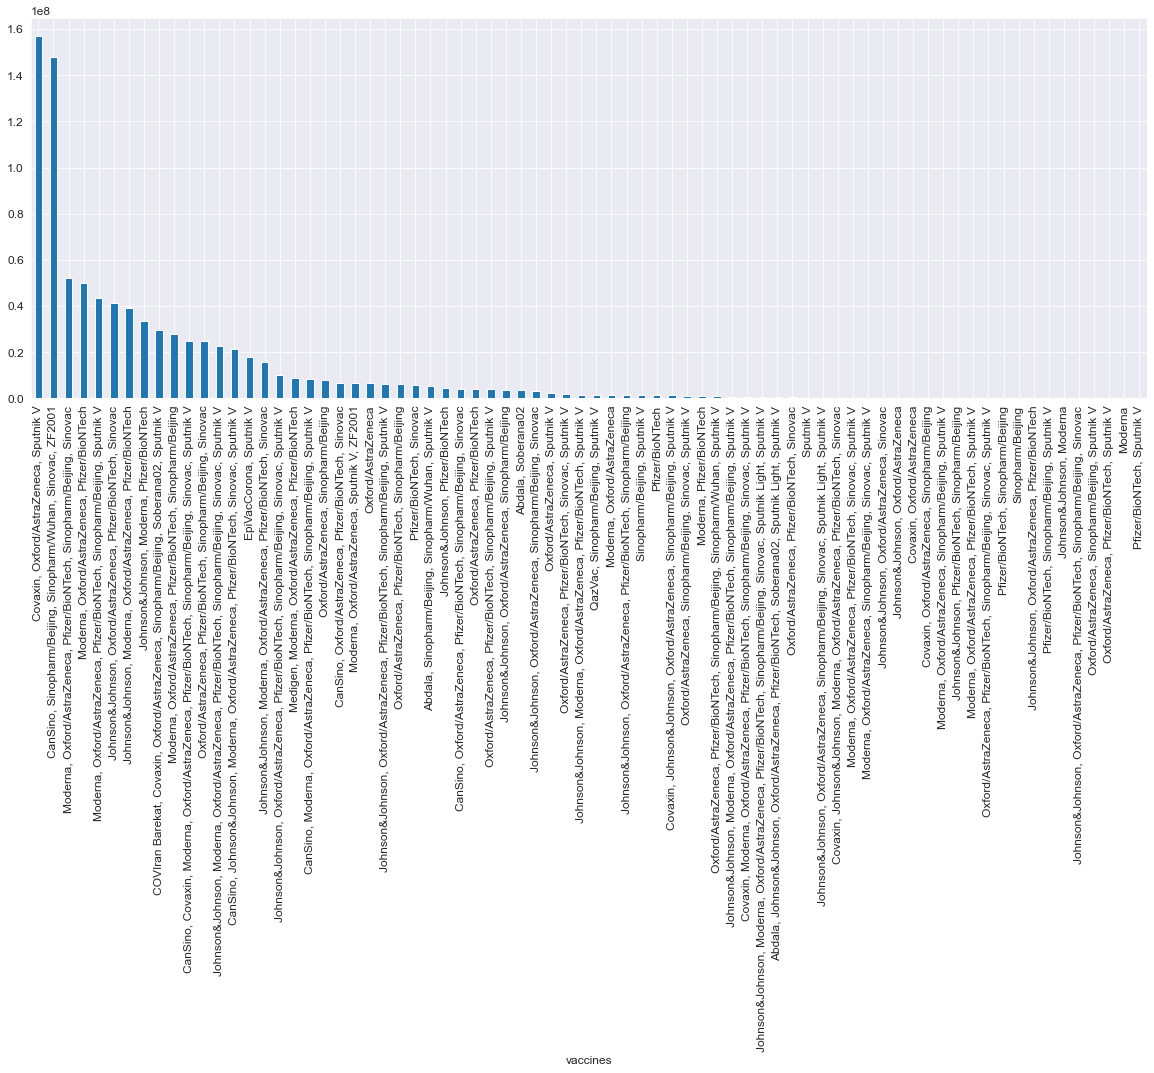

In [38]:
plt.figure(figsize=(20,7))
df_vaccines = df[["country","daily_vaccinations","vaccines"]].copy()
df_group = df_vaccines.groupby("vaccines")["daily_vaccinations"].sum()
df_group = df_group.sort_values(ascending=False).plot.bar()


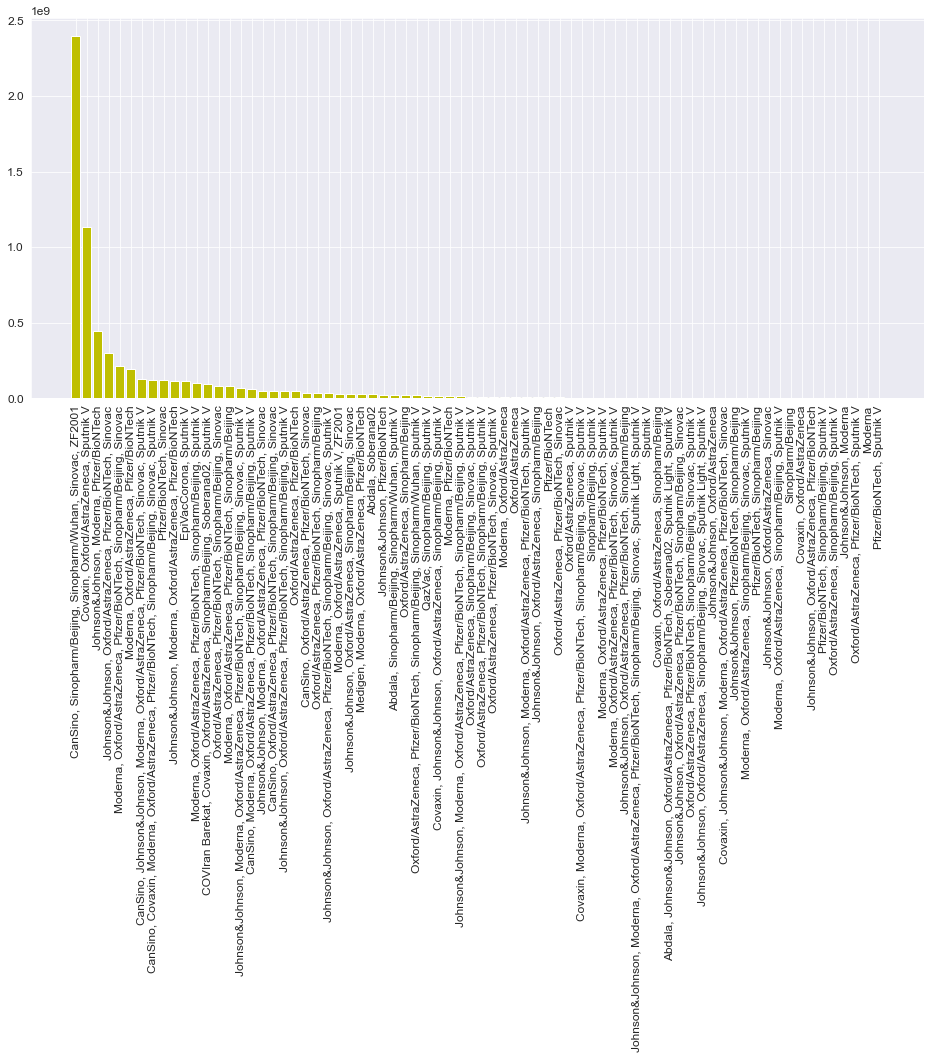

In [39]:
plt.figure(figsize=(16,7))
grp = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_no = df[grp].groupby('vaccines').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])

plt.bar(vacc_no.index, vacc_no.total_vaccinations, color ='y')

plt.xticks(rotation=90);

# 4. Which country is using what vaccine?

In [18]:
fig = px.choropleth(df, locations="iso_code",
                    color="vaccines",
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title= "Vaccines used by different countries")
fig.update_layout(showlegend=False)
fig.show()

# 5. Number of people vaccinated in the last month

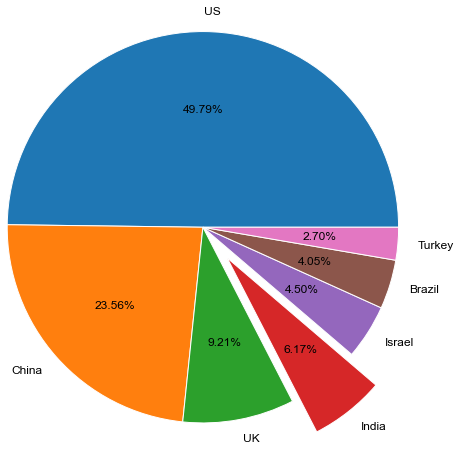

In [41]:
vacc_amount1 = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount1.drop(columns= ["iso_code","vaccines"] , inplace= True)
df_pie = vacc_amount1.head(7)
myexplode = [0, 0, 0, 0.3,0,0,0]
plt.pie(df_pie['total_vaccinations'], labels =  ["US", "China" , "UK" , "India" , "Israel" , "Brazil" , "Turkey"], textprops={'color':"k"} , autopct='%1.2f%%' ,  explode = myexplode, radius =  1.5)
plt.show()

From the above analysis and visualizations we can conclude that:
1) Many countries stated applying vaccines to their people by the end of 2020, whereas India started its vaccination programme from 15th Jan, 2021.

2) The rate of applying vaccines to the patients is highest in UK, whereas it is lowest in India. One of the reasons the rate of vaccine reaching people is low could be because India is a developing country.

3) Moderna, Pfizer/BioNTech is the most popular vaccine used worldwide, since it has almost negligible side effects (known till date). Also India uses Covaxin, Covishield for vaccinating its subjects.

4) Maximum number of people vaccinated is highest in USA since USA is a developed nation as well as it has better health facalities than other developing nations.

From the above inferences it can be concluded that people from all the parts of the world are educating themselves and willingly taking the vaccines in most parts of the world. Also these vaccines have been proved effective against COVID-19 (till now). If the rate of people taking the vaccine continues to grow then all the countries can vaccinate their people before the end of this year. 

# References

Resources :

1) Dataset : https://www.kaggle.com/gpreda/covid-world-vaccination-progress

3) DateTime library documentation : https://docs.python.org/3/library/datetime.html

4) Matplotlib documentation : https://matplotlib.org/3.1.1/contents.html

5) Tutorialspoint : https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

6) Seaborn documentation : https://seaborn.pydata.org/introduction.html

7) Pandas documentation : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.items.html

8) pie charts in matplotlib (w3schools) : https://www.w3schools.com/python/matplotlib_pie_charts.asp